# Spark Homework
## By: Nick Bruno (nhb3zf)

In [1]:
# Import Libraries
import pyspark
from os import listdir
from os.path import isfile, join
import boto3
import pandas as pd
from sagemaker import get_execution_role
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType

In [2]:
# Initialize the spark environment (takes ~ 1min)
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)

In [3]:
import pyspark.sql.functions as sf

### Connect to S3 and Read in Data

In [4]:
role = get_execution_role()
bucket='odl-spark19spds6003-001'
data_key = 'nhb3zf/wizards_df.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

In [5]:
pddf = pd.read_csv(data_location)

In [66]:
df = sqlc.createDataFrame(pd.read_csv(data_location))

In [7]:
display(df)

DataFrame[Rk: bigint, Game: double, Date: string, Age: string, Team: string, Opponent: string, Result: string, GS: bigint, MP: string, FG: double, FGA: double, FG%: double, 3P: double, 3PA: double, 3P%: double, FT: double, FTA: double, FT%: double, ORB: double, DRB: double, TRB: double, AST: double, STL: double, BLK: double, TOV: double, PF: double, PTS: double, GmSc: double, plus_minus: double, Name: string]

In [8]:
df.printSchema()

root
 |-- Rk: long (nullable = true)
 |-- Game: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Opponent: string (nullable = true)
 |-- Result: string (nullable = true)
 |-- GS: long (nullable = true)
 |-- MP: string (nullable = true)
 |-- FG: double (nullable = true)
 |-- FGA: double (nullable = true)
 |-- FG%: double (nullable = true)
 |-- 3P: double (nullable = true)
 |-- 3PA: double (nullable = true)
 |-- 3P%: double (nullable = true)
 |-- FT: double (nullable = true)
 |-- FTA: double (nullable = true)
 |-- FT%: double (nullable = true)
 |-- ORB: double (nullable = true)
 |-- DRB: double (nullable = true)
 |-- TRB: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- STL: double (nullable = true)
 |-- BLK: double (nullable = true)
 |-- TOV: double (nullable = true)
 |-- PF: double (nullable = true)
 |-- PTS: double (nullable = true)
 |-- GmSc: double (nullable = true)
 |-- plus_minu

### Convert to Parquet

In [10]:
# Write to parquet
parquetPath = '/home/ec2-user/SageMaker/Open-Data-Lab/education/nhb3zf/spark-homework-parquet'
df.write.parquet(parquetPath)

In [11]:
df_from_parquet = sqlc.read.parquet(parquetPath)

In [12]:
df_from_parquet

DataFrame[Rk: bigint, Game: double, Date: string, Age: string, Team: string, Opponent: string, Result: string, GS: bigint, MP: string, FG: double, FGA: double, FG%: double, 3P: double, 3PA: double, 3P%: double, FT: double, FTA: double, FT%: double, ORB: double, DRB: double, TRB: double, AST: double, STL: double, BLK: double, TOV: double, PF: double, PTS: double, GmSc: double, plus_minus: double, Name: string]

In [13]:
df

DataFrame[Rk: bigint, Game: double, Date: string, Age: string, Team: string, Opponent: string, Result: string, GS: bigint, MP: string, FG: double, FGA: double, FG%: double, 3P: double, 3PA: double, 3P%: double, FT: double, FTA: double, FT%: double, ORB: double, DRB: double, TRB: double, AST: double, STL: double, BLK: double, TOV: double, PF: double, PTS: double, GmSc: double, plus_minus: double, Name: string]

As we can see, after writing the dataframe to parquet, it is easy to read it from parquet, and 'df_from_parquet' is equivalent to 'df', as we would expect.

### SQL Analysis

In [14]:
df.registerTempTable("wizards_df")

In [15]:
# Compare shooting statistics between John Wall and Bradley Bealbb_
jw_shooting = sqlc.sql(""" SELECT FG, FGA,3P, 3PA, FT, FTA
                      FROM wizards_df
                      WHERE Name == 'Wall'
                      """)

In [16]:
bb_shooting = sqlc.sql(""" SELECT FG, FGA,3P, 3PA, FT, FTA
                      FROM wizards_df
                      WHERE Name == 'Beal'
                      """)

In [17]:
jw_shooting.show()

+----+----+---+---+----+----+
|  FG| FGA| 3P|3PA|  FT| FTA|
+----+----+---+---+----+----+
|10.0|28.0|0.0|3.0| 8.0| 9.0|
| 8.0|12.0|1.0|3.0| 9.0|11.0|
| 3.0|13.0|0.0|3.0|13.0|15.0|
| 7.0|22.0|1.0|5.0| 3.0| 4.0|
| 7.0|20.0|2.0|7.0| 4.0| 6.0|
| 7.0|12.0|5.0|6.0| 0.0| 0.0|
|10.0|18.0|1.0|4.0| 0.0| 4.0|
| 4.0|13.0|0.0|3.0| 5.0|12.0|
| 5.0|10.0|0.0|1.0|13.0|18.0|
| 8.0|18.0|0.0|2.0| 7.0| 7.0|
| 4.0| 8.0|0.0|1.0| 5.0| 6.0|
| 8.0|10.0|4.0|4.0| 1.0| 1.0|
| 9.0|21.0|2.0|3.0| 7.0| 8.0|
| 3.0|12.0|2.0|7.0| 0.0| 0.0|
| 5.0|13.0|1.0|3.0| 4.0| 5.0|
|13.0|26.0|0.0|5.0| 5.0| 6.0|
| 6.0|15.0|1.0|3.0| 0.0| 4.0|
| 5.0|16.0|1.0|6.0| 4.0| 7.0|
| 6.0|16.0|2.0|5.0| 1.0| 2.0|
| 6.0|18.0|4.0|8.0| 2.0| 4.0|
+----+----+---+---+----+----+
only showing top 20 rows



In [18]:
bb_shooting.show()

+----+----+---+----+----+----+
|  FG| FGA| 3P| 3PA|  FT| FTA|
+----+----+---+----+----+----+
| 6.0|17.0|1.0| 4.0|12.0|16.0|
| 9.0|18.0|1.0| 3.0| 6.0| 7.0|
| 8.0|17.0|1.0| 5.0| 3.0| 3.0|
|11.0|23.0|2.0| 7.0| 4.0| 6.0|
| 2.0| 7.0|0.0| 2.0| 0.0| 0.0|
| 6.0|11.0|1.0| 3.0| 2.0| 2.0|
|12.0|25.0|6.0|12.0|10.0|11.0|
|12.0|19.0|1.0| 5.0|11.0|13.0|
|16.0|26.0|4.0| 6.0| 2.0| 3.0|
| 8.0|20.0|3.0| 8.0| 4.0| 5.0|
| 8.0|16.0|2.0| 5.0| 4.0| 5.0|
| 7.0|13.0|2.0| 4.0| 3.0| 4.0|
| 5.0|11.0|1.0| 6.0| 3.0| 3.0|
| 6.0|19.0|1.0| 6.0|13.0|14.0|
| 9.0|22.0|5.0|12.0| 3.0| 4.0|
|11.0|23.0|5.0| 9.0| 0.0| 0.0|
|10.0|16.0|2.0| 5.0| 1.0| 2.0|
| 7.0|22.0|3.0| 8.0| 5.0| 7.0|
|10.0|24.0|3.0|10.0| 3.0| 4.0|
| 2.0|11.0|0.0| 1.0| 4.0| 6.0|
+----+----+---+----+----+----+
only showing top 20 rows



In [19]:
# Compare Field Goal shooting percentage between them
jw_shooting_percentage = sqlc.sql(""" SELECT SUM(FG)/SUM(FGA) AS FG_PERC
                                    FROM wizards_df
                                    WHERE Name == 'Wall'
                                    """)
jw_shooting_percentage.show()

+-------------------+
|            FG_PERC|
+-------------------+
|0.44100856327307325|
+-------------------+



In [20]:
bb_shooting_percentage = sqlc.sql(""" SELECT SUM(FG)/SUM(FGA) AS FG_PERC
                                    FROM wizards_df
                                    WHERE Name == 'Beal'
                                    """)
bb_shooting_percentage.show()

+-------------------+
|            FG_PERC|
+-------------------+
|0.47042052744119744|
+-------------------+



Given the data, Bradley Beal has a higher shooting percentage (0.47) compared to John Wall (0.44).

In [21]:
# Who has a better plus-minus?
jw_plus_minus = sqlc.sql(""" SELECT SUM(plus_minus) AS tot_pm
                             FROM wizards_df
                             WHERE Name == 'Wall'
                             """)
jw_plus_minus.show()

+------+
|tot_pm|
+------+
| 374.0|
+------+



In [22]:
bb_plus_minus = sqlc.sql(""" SELECT SUM(plus_minus) AS tot_pm
                             FROM wizards_df
                             WHERE Name == 'Beal'
                             """)
bb_plus_minus.show()

+------+
|tot_pm|
+------+
| 513.0|
+------+



A basketball player wants to have a high plus-minus total, so this shows that Bradley Beal also has a higher total plus_minus compared to John Wall in the dataset. This could be a result of the fact taht Bradley Beal played more games over the span of the dataset.

### MLlib Analysis

In [27]:
df.printSchema()

root
 |-- Rk: long (nullable = true)
 |-- Game: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- Opponent: string (nullable = true)
 |-- Result: string (nullable = true)
 |-- GS: long (nullable = true)
 |-- MP: string (nullable = true)
 |-- FG: double (nullable = true)
 |-- FGA: double (nullable = true)
 |-- FG%: double (nullable = true)
 |-- 3P: double (nullable = true)
 |-- 3PA: double (nullable = true)
 |-- 3P%: double (nullable = true)
 |-- FT: double (nullable = true)
 |-- FTA: double (nullable = true)
 |-- FT%: double (nullable = true)
 |-- ORB: double (nullable = true)
 |-- DRB: double (nullable = true)
 |-- TRB: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- STL: double (nullable = true)
 |-- BLK: double (nullable = true)
 |-- TOV: double (nullable = true)
 |-- PF: double (nullable = true)
 |-- PTS: double (nullable = true)
 |-- GmSc: double (nullable = true)
 |-- plus_minu

In [29]:
# First look at a correlation between shots made and shots attempted (should be high)
df.corr('FG', 'FGA')

0.7456589999329699

In [31]:
df.corr('FG', 'AST')
# Not a strong correlation between Field Goal makes and Assists

-0.05956550937315339

In [32]:
df.corr('ORB','DRB')
# Not a strong correlation between Offensive Rebounds and Defensive Rebounds

0.13449333768651842

#### Select two features for analysis

In [67]:
# I will choose assists (AST) and turnovers (TOV)
df_analysis = df.select("AST","TOV")

# AST = feature, TOV = label

In [68]:
# split into train/test sets
seed = 8
(testDF, trainingDF) = df_analysis.randomSplit((0.20, 0.80), seed=seed)
print ('training set N = {}, test set N = {}'.format(trainingDF.count(),testDF.count()))

training set N = 222, test set N = 56


In [69]:
from pyspark.ml.linalg import Vectors, VectorUDT

In [70]:
# make a user defined function (udf)
sqlc.registerFunction("oneElementVec", lambda d: Vectors.dense([d]), returnType=VectorUDT())

# vectorize the data frames
trainingDF = trainingDF.selectExpr("TOV", "oneElementVec(AST) as AST")
testDF = testDF.selectExpr("TOV", "oneElementVec(AST) as AST")

print(testDF.orderBy(testDF.TOV.desc()).limit(5))

DataFrame[TOV: double, AST: vector]


In [71]:
# rename to make ML engine happy
trainingDF = trainingDF.withColumnRenamed("TOV", "label").withColumnRenamed("AST", "features")
testDF = testDF.withColumnRenamed("TOV", "label").withColumnRenamed("AST", "features")

In [72]:
from pyspark.ml.regression import LinearRegression, LinearRegressionModel

lr = LinearRegression()
lrModel = lr.fit(trainingDF)

In [73]:
predictionsAndLabelsDF = lrModel.transform(testDF)

print(predictionsAndLabelsDF.orderBy(predictionsAndLabelsDF.label.desc()).take(5))

[Row(label=11.0, features=DenseVector([11.0]), prediction=3.7003025774602922), Row(label=9.0, features=DenseVector([11.0]), prediction=3.7003025774602922), Row(label=8.0, features=DenseVector([10.0]), prediction=3.5317081746806513), Row(label=7.0, features=DenseVector([2.0]), prediction=2.1829529524435216), Row(label=7.0, features=DenseVector([3.0]), prediction=2.351547355223163)]


In [85]:
predictionsAndLabelsDF.show()

+-----+--------+------------------+
|label|features|        prediction|
+-----+--------+------------------+
|  2.0|   [0.0]|1.8457641468842392|
|  5.0|   [0.0]|1.8457641468842392|
|  1.0|   [1.0]|2.0143585496638803|
|  2.0|   [1.0]|2.0143585496638803|
|  5.0|   [1.0]|2.0143585496638803|
|  0.0|   [2.0]|2.1829529524435216|
|  1.0|   [2.0]|2.1829529524435216|
|  2.0|   [2.0]|2.1829529524435216|
|  3.0|   [2.0]|2.1829529524435216|
|  4.0|   [2.0]|2.1829529524435216|
|  7.0|   [2.0]|2.1829529524435216|
|  0.0|   [3.0]| 2.351547355223163|
|  1.0|   [3.0]| 2.351547355223163|
|  1.0|   [3.0]| 2.351547355223163|
|  1.0|   [3.0]| 2.351547355223163|
|  3.0|   [3.0]| 2.351547355223163|
|  4.0|   [3.0]| 2.351547355223163|
|  7.0|   [3.0]| 2.351547355223163|
|  1.0|   [4.0]| 2.520141758002804|
|  2.0|   [4.0]| 2.520141758002804|
+-----+--------+------------------+
only showing top 20 rows



### Model Evaluation

In [44]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator()

In [45]:
eval.setMetricName("rmse").evaluate(predictionsAndLabelsDF)

2.3074649414869226

In [46]:
eval.setMetricName("r2").evaluate(predictionsAndLabelsDF) # very low

0.10248865756741798

## SQL Visualizations

In [7]:
import matplotlib.pyplot as plt

First I want to compare the plus-minus statistic of John Wall and Bradley Beal over time

In [8]:
# Separating the data by player
bb = pddf[pddf['Name'] == 'Beal']
jw = pddf[pddf['Name'] == 'Wall']

In [8]:
x = bb.Date
y = bb.plus_minus

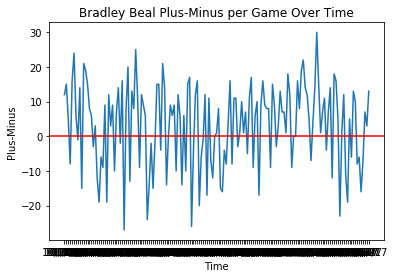

In [9]:
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Plus-Minus')
plt.title('Bradley Beal Plus-Minus per Game Over Time')
plt.axhline(y=0, color='r', linestyle='-') # Source: https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib

In [10]:
x = jw.Date
y = jw.plus_minus

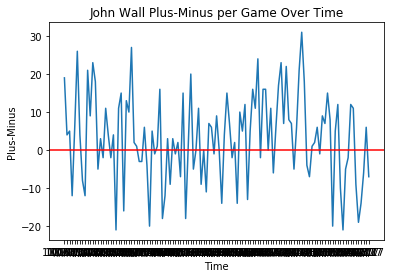

In [11]:
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Plus-Minus')
plt.title('John Wall Plus-Minus per Game Over Time')
plt.axhline(y=0, color='r', linestyle='-')

This is not very informative, so I will make a line plot of the plus-minus statistic for each player over time.

In [9]:
ct_list = []
ct = 0
for i in range(len(bb)):
    ct += bb.plus_minus[i]
    ct_list.append(ct)
    
bb['plus_minus_counter'] = ct_list

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
bb['plus_minus'].head()

0    12.0
1    15.0
2     5.0
3    -8.0
4    16.0
Name: plus_minus, dtype: float64

In [11]:
bb['plus_minus_counter'].head()

0    12.0
1    27.0
2    32.0
3    24.0
4    40.0
Name: plus_minus_counter, dtype: float64

This proves that the code works. I will now do the same for John Wall

In [52]:
jw.reset_index()

,index,Rk,Game,Date,Age,Team,Opponent,Result,GS,MP,...,AST,STL,BLK,TOV,PF,PTS,GmSc,plus_minus,Name,plus_minus_counter
0,159,1,1.0,10/18/17,27-042,WAS,PHI,W (+5),1,37:09:00,...,8.0,0.0,2.0,2.0,2.0,28.0,18.5,19.0,Wall,19.0
1,160,2,2.0,10/20/17,27-044,WAS,DET,W (+4),1,33:34:00,...,10.0,1.0,2.0,8.0,1.0,26.0,21.9,4.0,Wall,23.0
2,161,3,3.0,10/23/17,27-047,WAS,DEN,W (+5),1,35:02:00,...,12.0,2.0,1.0,2.0,2.0,19.0,18.9,5.0,Wall,28.0
3,162,4,4.0,10/25/17,27-049,WAS,LAL,L (-3),1,40:32:00,...,9.0,1.0,0.0,4.0,1.0,18.0,8.8,-12.0,Wall,16.0
4,163,5,5.0,10/27/17,27-051,WAS,GSW,L (-3),1,37:43:00,...,14.0,1.0,1.0,4.0,3.0,20.0,14.9,6.0,Wall,22.0
5,164,6,6.0,10/29/17,27-053,WAS,SAC,W (+27),1,26:23:00,...,9.0,1.0,1.0,6.0,0.0,19.0,16.4,26.0,Wall,48.0
6,165,7,7.0,11/1/17,27-056,WAS,PHO,L (-6),1,35:57:00,...,6.0,3.0,1.0,4.0,5.0,21.0,14.2,4.0,Wall,52.0
7,166,8,8.0,11/3/17,27-058,WAS,CLE,L (-8),1,38:28:00,...,15.0,1.0,1.0,1.0,0.0,13.0,15.7,-8.0,Wall,44.0
8,167,10,9.0,11/7/17,27-062,WAS,DAL,L (-14),1,37:13:00,...,14.0,1.0,1.0,4.0,3.0,23.0,23.2,-12.0,Wall,32.0
9,168,11,10.0,11/9/17,27-064,WAS,LAL,W (+16),1,31:30:00,...,5.0,2.0,3.0,2.0,3.0,23.0,20.8,21.0,Wall,53.0


In [17]:
ct_list = []
ct = 0
for i in range(len(jw)):
    ct += jw['plus_minus'].iloc[i]
    ct_list.append(ct)
jw['plus_minus_counter'] = ct_list

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
jw['plus_minus'].head()

159    19.0
160     4.0
161     5.0
162   -12.0
163     6.0
Name: plus_minus, dtype: float64

In [20]:
jw['plus_minus_counter'].head()

159    19.0
160    23.0
161    28.0
162    16.0
163    22.0
Name: plus_minus_counter, dtype: float64

#### Plot plus-minus results

In [49]:
x = bb.Date
y = bb.plus_minus_counter

Text(0.5,1,'Bradley Beal Plus-Minus Counter over Time')

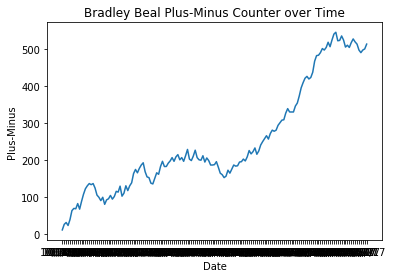

In [42]:
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Plus-Minus')
plt.title('Bradley Beal Plus-Minus Counter over Time')

In [48]:
x1 = jw.Date
y1 = jw.plus_minus_counter

Text(0.5,1,'John Wall Plus-Minus Counter over Time')

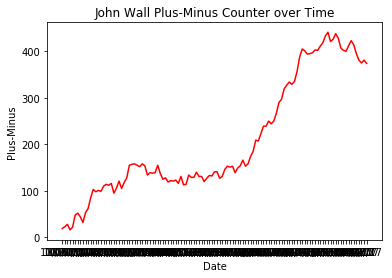

In [39]:
plt.plot(x1,y1, color='Red')
plt.xlabel('Date')
plt.ylabel('Plus-Minus')
plt.title('John Wall Plus-Minus Counter over Time')

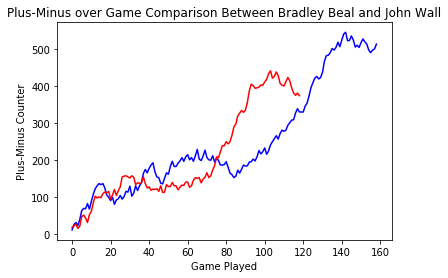

In [60]:
# Plot over one another, with the x-axis being games played since the start of the 2017 season
x = bb.index
x1 = range(len(jw))
plt.plot(x,y, color='Blue')
plt.plot(x1,y1, color='Red')
plt.xlabel('Game Played')
plt.ylabel('Plus-Minus Counter')
plt.title('Plus-Minus over Game Comparison Between Bradley Beal and John Wall')
plt.show()

Again, this illustrates that Bradley Beal's plus-minus statistic has been higher since the start of the 2017 season, and this is likely because he played in more games compared to John Wall, since at game 119 (John Wall's final game in the 2018 season), he actually has a higher plus-minus statistic compared to Bradley Beal.

## Machine Learning Visualizations

Now I will plot visualizations for the linear regression found in the machine learning section of this notebook.

In [127]:
# Find the slope and intercept of our model
slope = lrModel.coefficients
b = lrModel.intercept
# Source: https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

1.8457641468842392


In [141]:
x_val_list = []
for i in range(13):
    x_val = i*slope + b
    x_val_list.append(x_val)
x_tov = [0,1,2,3,4,5,6,7,8,9,10,11, 12]

In [142]:
# Create a dataframe of these predictions, ranging from 0 to 12
x_df = pd.DataFrame()
x_df['x_tov'] = x_tov
x_df['preds'] = x_val_list
x_df.head()

,x_tov,preds
0,0,[1.8457641468842392]
1,1,[2.0143585496638803]
2,2,[2.1829529524435216]
3,3,[2.351547355223163]
4,4,[2.520141758002804]


In [143]:
# transform 'preds' from an array into a float number
x_df['preds_new'] = x_df['preds'].str.get(0)

Text(0.5,1,'Comparison of Turnovers and Assists per Game')

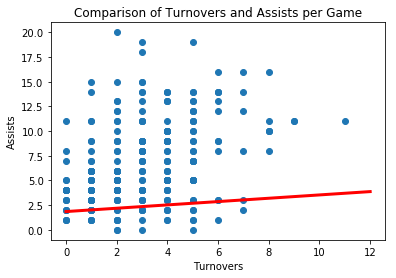

In [144]:
# Plot the regression line over the scatter plot of turnovers and assits per game
plt.scatter(pddf.TOV, pddf.AST)
plt.plot(x_df.x_tov, x_df.preds_new, color='Red', linewidth=3)
plt.xlabel('Turnovers')
plt.ylabel('Assists')
plt.title('Comparison of Turnovers and Assists per Game')

This shows that there is not a great linear relationship between assits and turnovers per game. This is not surprising, as the correlation between the two variables was not strong.